escudoUnal (3).svg

# SciKit-Fuzzy: Introducción

In [1]:
!pip install scikit-fuzzy

   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/920.8 kB ? eta -:--:--
   ---------------------- ----------------- 524.3/920.8 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 920.8/920.8 kB 2.0 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\users\cogito ergo sum\appdata\local\programs\python\python312\lib\site-packages\homework-0.1-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Crear las variables del universo para edad, porcentaje de manejo y riesgo financiero
# Estas variables modelan el rango de valores que cada variable puede tomar.

edad = ctrl.Antecedent(np.arange(18, 71, 1), 'edad')
porcentaje_manejo = ctrl.Antecedent(np.arange(0, 101, 1), 'porcentaje_manejo')
riesgo_financiero = ctrl.Consequent(np.arange(0, 101, 1), 'riesgo_financiero')


# Definir funciones de pertenencia manualmente

edad['joven'] = fuzz.trapmf(edad.universe, [18, 18, 25, 30])
edad['adulto'] = fuzz.trimf(edad.universe, [20, 35, 50])
edad['mayor'] = fuzz.trapmf(edad.universe, [40, 60, 70, 70])

porcentaje_manejo['bajo'] = fuzz.trapmf(porcentaje_manejo.universe, [0, 0, 10, 20])
porcentaje_manejo['medio'] = fuzz.trimf(porcentaje_manejo.universe, [10, 40, 60])
porcentaje_manejo['alto'] = fuzz.trapmf(porcentaje_manejo.universe, [50, 70, 100, 100])

riesgo_financiero['bajo'] = fuzz.trapmf(riesgo_financiero.universe, [0, 0, 10, 20])
riesgo_financiero['medio'] = fuzz.trimf(riesgo_financiero.universe, [10, 30, 45])
riesgo_financiero['alto'] = fuzz.trapmf(riesgo_financiero.universe, [40, 55, 100, 100])

# Crear reglas difusas para controlar la lógica del sistema
# Estas reglas determinan el riesgo financiero en función de las edad y porcentaje de manejo actual

rule1 = ctrl.Rule(edad['joven'] & porcentaje_manejo['bajo'], riesgo_financiero['medio'])
rule2 = ctrl.Rule(edad['joven'] & porcentaje_manejo['medio'], riesgo_financiero['alto'])
rule3 = ctrl.Rule(edad['joven'] & porcentaje_manejo['alto'], riesgo_financiero['alto'])
rule4 = ctrl.Rule(edad['adulto'] & porcentaje_manejo['bajo'], riesgo_financiero['bajo'])
rule5 = ctrl.Rule(edad['adulto'] & porcentaje_manejo['medio'], riesgo_financiero['medio'])
rule6 = ctrl.Rule(edad['adulto'] & porcentaje_manejo['alto'], riesgo_financiero['alto'])
rule7 = ctrl.Rule(edad['mayor'] & porcentaje_manejo['bajo'], riesgo_financiero['medio'])
rule8 = ctrl.Rule(edad['mayor'] & porcentaje_manejo['medio'], riesgo_financiero['alto'])
rule9 = ctrl.Rule(edad['mayor'] & porcentaje_manejo['alto'], riesgo_financiero['alto'])

# Construir el sistema de control y crear una simulación
# Este sistema utiliza las reglas definidas para determinar la salida en función de las entradas.
control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
calculador_riesgo = ctrl.ControlSystemSimulation(control_system)

# Proveer entradas al sistema de control
# Estos valores representan un escenario específico que se desea evaluar.
calculador_riesgo.input['edad'] = 25
calculador_riesgo.input['porcentaje_manejo'] = 50

# Realizar los cálculos para obtener la salida
# Este paso realiza la inferencia difusa utilizando las reglas y métodos definidos.
calculador_riesgo.compute()




In [ ]:
# Imprimir el % de riesgo financiero calculado
print(f"Riesgo financiero calculado: {calculador_riesgo.output['riesgo_financiero']:.2f}%")

Riesgo financiero calculado: 60.74%


c:\Users\Cogito ergo sum\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


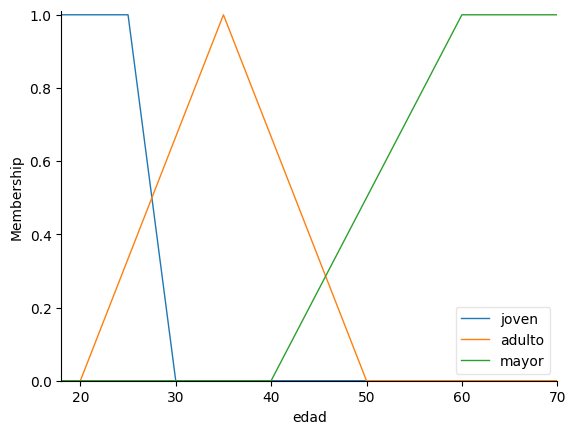

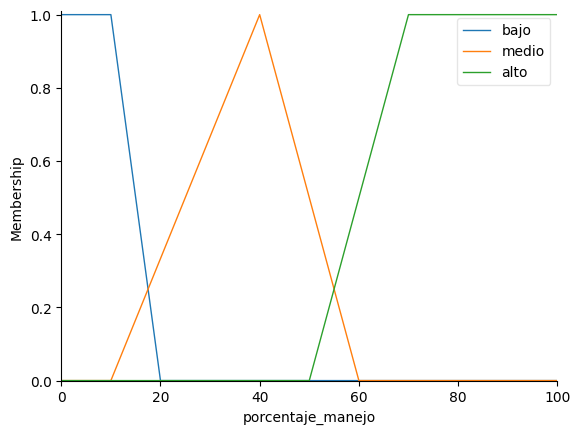

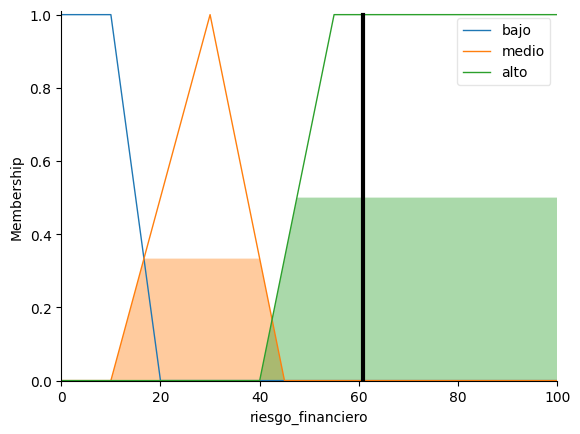

In [ ]:
# Visualizar los resultados
# Las siguientes líneas generan gráficos de las funciones de pertenencia y de la salida del sistema.
edad.view()
porcentaje_manejo.view()
riesgo_financiero.view(sim=calculador_riesgo)

FACULTAD DE MINAS<br>
Sede Medellín

SINTELWEB<br>
Grupo de Investigación<br>
Sistemas Inteligentes Web